In [1]:
import pandas as pd
df = pd.read_csv('data/raw/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


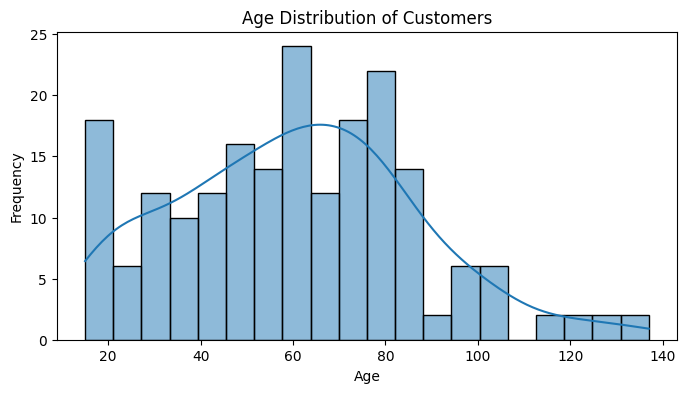

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Annual Income vs Spending Score')

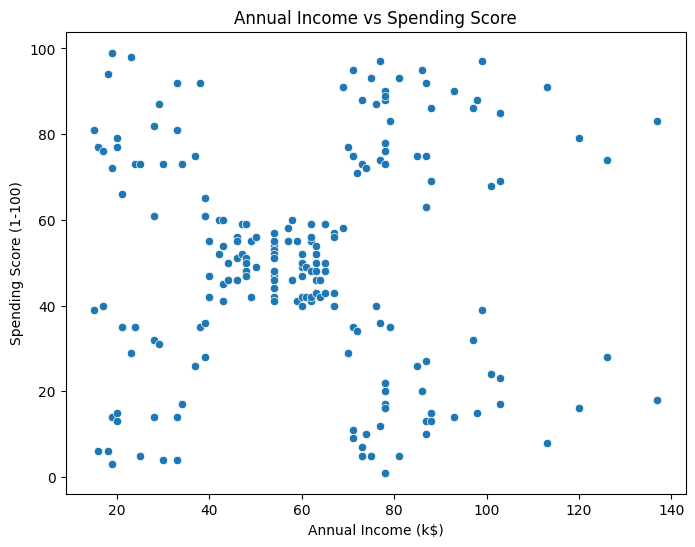

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")


Text(0.5, 1.0, 'Customer Gender Distribution')

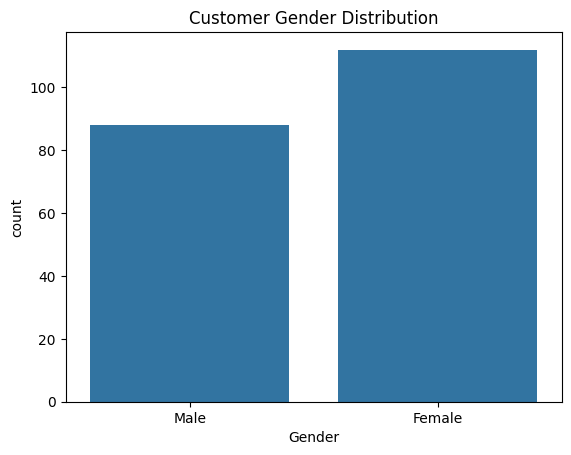

In [11]:
sns.countplot(data=df, x="Gender")
plt.title("Customer Gender Distribution")

Text(0.5, 1.0, 'Age vs Spending Score by Gender')

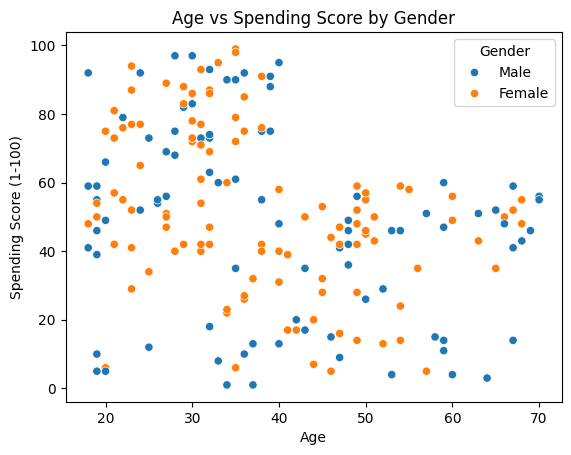

In [15]:
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")
plt.title("Age vs Spending Score by Gender")

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

km = KMeans(n_clusters=5, random_state=42)
df["Segment"] = km.fit_predict(scaled)

Text(0.5, 1.0, 'Customer Segments (K-Means)')

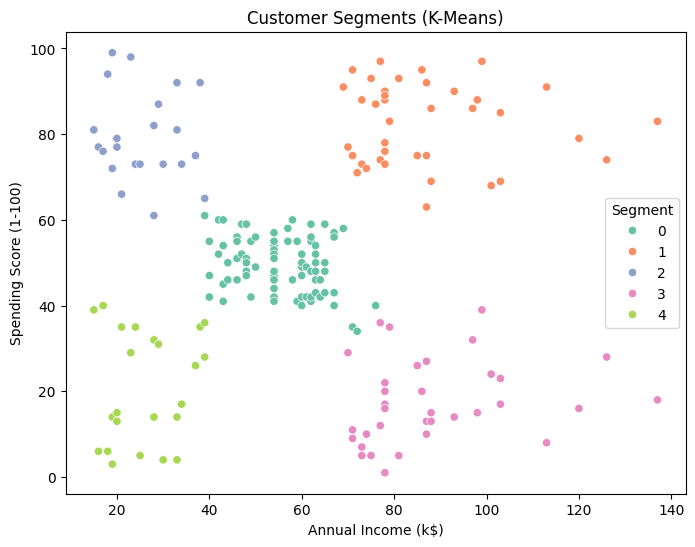

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Annual Income (k$)"],
                y=df["Spending Score (1-100)"],
                hue=df["Segment"],
                palette="Set2")
plt.title("Customer Segments (K-Means)")


In [18]:
df.groupby("Segment")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Segment,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [19]:
segment_summary = (
    df.groupby("Segment")
      .agg({
         "Age": "mean",
         "Annual Income (k$)": "mean",
         "Spending Score (1-100)": "mean",
         "CustomerID": "count"
      })
      .rename(columns={"CustomerID":"Count"})
)
print(segment_summary)


               Age  Annual Income (k$)  Spending Score (1-100)  Count
Segment                                                              
0        42.716049           55.296296               49.518519     81
1        32.692308           86.538462               82.128205     39
2        25.272727           25.727273               79.363636     22
3        41.114286           88.200000               17.114286     35
4        45.217391           26.304348               20.913043     23


In [20]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled, df["Segment"])
print("Silhouette Score:", score)


Silhouette Score: 0.5546571631111091


<Axes: xlabel='PC1', ylabel='PC2'>

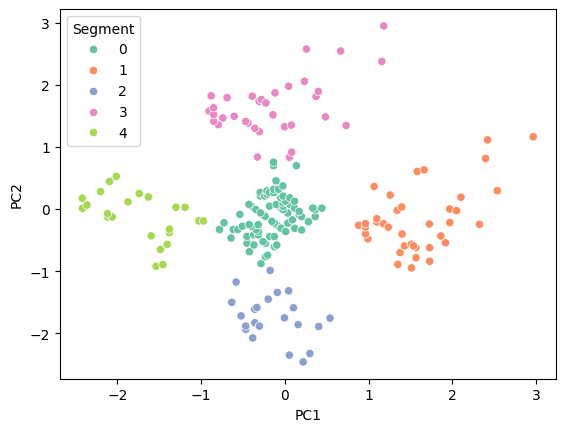

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(scaled)
df["PC1"], df["PC2"] = coords[:,0], coords[:,1]
sns.scatterplot(x="PC1", y="PC2", hue="Segment", data=df, palette="Set2")
